In [26]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("D:/Clinical_data_prediction/data/processed/preprocessed_data.csv")
print(df.head(5))

   Hour    HR  O2Sat   Temp    SBP   MAP   DBP  Resp  BaseExcess  HCO3  ...  \
0     7  87.0   99.0  36.06  108.0  93.0  51.0  30.0        -2.0  24.0  ...   
1     8  82.0   95.0  36.06  108.0  93.0  51.0  28.0        -2.0  24.0  ...   
2     9  79.0   95.0  36.06  108.0  83.0  51.0  33.0        -2.0  24.0  ...   
3    10  82.0   95.0  36.06  108.0  76.0  51.0  26.0        -2.0  24.0  ...   
4    11  90.0   97.0  36.72  108.0  87.0  51.0  19.5        -2.0  24.0  ...   

   Unit2  HospAdmTime  ICULOS  SepsisLabel  InfectionLabel  KidneyDysfunction  \
0    0.0       -35.65     8.0            1               1              False   
1    0.0       -35.65     9.0            1               1              False   
2    0.0       -35.65    10.0            1               1              False   
3    0.0       -35.65    11.0            1               1              False   
4    0.0       -35.65    12.0            1               0              False   

   LiverDysfunction  CardioDysfunction

In [28]:
df['InfectionLabel'].value_counts()

InfectionLabel
0    858393
1    693817
Name: count, dtype: int64

In [29]:
df['OrganDysfunctionLabel'].value_counts()

OrganDysfunctionLabel
1    953987
0    598223
Name: count, dtype: int64

In [30]:
df['SepsisLabel'].value_counts()

SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64

In [31]:
df[(df['InfectionLabel'] == 1) & (df['SepsisLabel'] == 1)]['Temp'].describe()

count    17022.000000
mean        37.156591
std          1.019636
min         30.500000
25%         36.560000
50%         37.170000
75%         37.830000
max         40.900000
Name: Temp, dtype: float64

In [32]:
df[(df['InfectionLabel'] == 1) & (df['SepsisLabel'] == 0)]

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Unit2,HospAdmTime,ICULOS,SepsisLabel,InfectionLabel,KidneyDysfunction,LiverDysfunction,CardioDysfunction,RespDysfunction,OrganDysfunctionLabel
27918,2,64.0,98.0,36.44,125.0,64.00,41.0,27.0,-2.0,22.0,...,1.0,-98.60,3.0,0,1,True,True,False,False,1
27939,0,107.0,100.0,37.06,138.0,100.67,36.0,20.0,-2.0,22.0,...,0.0,-0.04,3.0,0,1,True,True,False,False,1
27940,1,108.5,97.5,37.06,128.5,76.83,36.0,23.0,-2.0,22.0,...,0.0,-0.04,4.0,0,1,True,True,False,False,1
27941,2,109.5,98.5,36.72,129.0,94.33,36.0,14.0,-2.0,22.0,...,0.0,-0.04,5.0,0,1,True,True,False,False,1
27943,4,108.0,99.0,36.81,116.0,70.67,36.0,22.0,-2.0,22.0,...,0.0,-0.04,7.0,0,1,True,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552205,42,63.0,96.0,38.00,110.0,79.00,56.0,18.0,NaN,NaN,...,1.0,-66.55,43.0,0,1,False,False,False,False,0
1552206,43,61.5,98.0,38.00,122.0,80.00,56.0,22.0,NaN,NaN,...,1.0,-66.55,44.0,0,1,False,False,False,False,0
1552207,44,59.0,98.0,37.90,110.0,80.00,57.0,18.0,NaN,NaN,...,1.0,-66.55,45.0,0,1,False,False,False,False,0
1552208,45,60.0,92.0,37.90,142.0,114.00,96.0,18.0,NaN,NaN,...,1.0,-66.55,46.0,0,1,False,False,False,False,0


In [33]:
df[(df['InfectionLabel'] == 0) & (df['SepsisLabel'] == 1)]

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Unit2,HospAdmTime,ICULOS,SepsisLabel,InfectionLabel,KidneyDysfunction,LiverDysfunction,CardioDysfunction,RespDysfunction,OrganDysfunctionLabel
4,11,90.0,97.0,36.72,108.0,87.0,51.0,19.50,-2.0,24.0,...,0.0,-35.65,12.0,1,0,False,False,False,False,0
5,12,78.0,93.0,36.72,108.0,81.0,51.0,20.00,-2.0,24.0,...,0.0,-35.65,13.0,1,0,False,False,False,False,0
6,13,81.0,94.0,36.72,108.0,83.0,51.0,19.00,-2.0,24.0,...,0.0,-35.65,14.0,1,0,False,False,False,False,0
7,14,81.0,94.0,36.72,108.0,83.0,51.0,19.00,3.0,24.0,...,0.0,-35.65,15.0,1,0,False,False,False,False,0
8,15,79.5,98.5,35.83,108.0,82.5,51.0,18.75,3.0,24.0,...,0.0,-35.65,16.0,1,0,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27901,89,88.0,99.0,37.80,137.0,96.0,73.0,2.00,NaN,NaN,...,1.0,0.00,90.0,1,0,False,False,False,False,0
27902,90,82.0,100.0,37.80,128.0,90.0,67.0,2.00,NaN,NaN,...,1.0,0.00,91.0,1,0,False,False,False,False,0
27903,91,74.0,99.5,37.80,121.0,88.0,66.0,2.00,NaN,NaN,...,1.0,0.00,92.0,1,0,False,False,False,False,0
27904,92,72.0,100.0,38.20,126.0,90.0,72.0,2.00,NaN,NaN,...,1.0,0.00,93.0,1,0,False,False,False,False,0


In [34]:
print(df.describe())

               Hour            HR         O2Sat          Temp           SBP  \
count  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06  1.552210e+06   
mean   2.310334e+01  8.435771e+01  9.726254e+01  3.687166e+01  1.235211e+02   
std    1.900731e+01  1.735536e+01  2.408435e+00  7.167741e-01  2.276182e+01   
min    0.000000e+00  2.000000e+01  3.000000e+01  2.090000e+01  2.500000e+01   
25%    9.000000e+00  7.200000e+01  9.600000e+01  3.640000e+01  1.070000e+02   
50%    1.900000e+01  8.300000e+01  9.800000e+01  3.683000e+01  1.210000e+02   
75%    3.300000e+01  9.500000e+01  9.900000e+01  3.730000e+01  1.380000e+02   
max    3.350000e+02  2.800000e+02  1.000000e+02  5.000000e+01  2.800000e+02   

                MAP           DBP          Resp    BaseExcess          HCO3  \
count  1.552210e+06  1.552210e+06  1.552210e+06  1.550000e+06  1.540000e+06   
mean   8.247435e+01  6.338463e+01  1.859679e+01 -1.391367e+00  2.371090e+01   
std    1.559775e+01  1.341897e+01  4.656408e+00  3.

In [35]:
df.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'InfectionLabel',
       'KidneyDysfunction', 'LiverDysfunction', 'CardioDysfunction',
       'RespDysfunction', 'OrganDysfunctionLabel'],
      dtype='object')

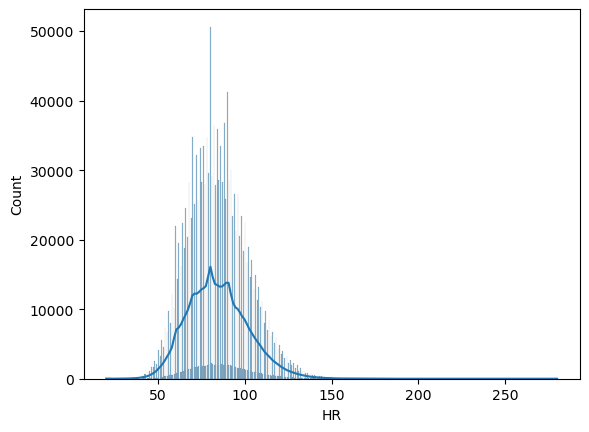

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['HR'], kde=True)
plt.show()


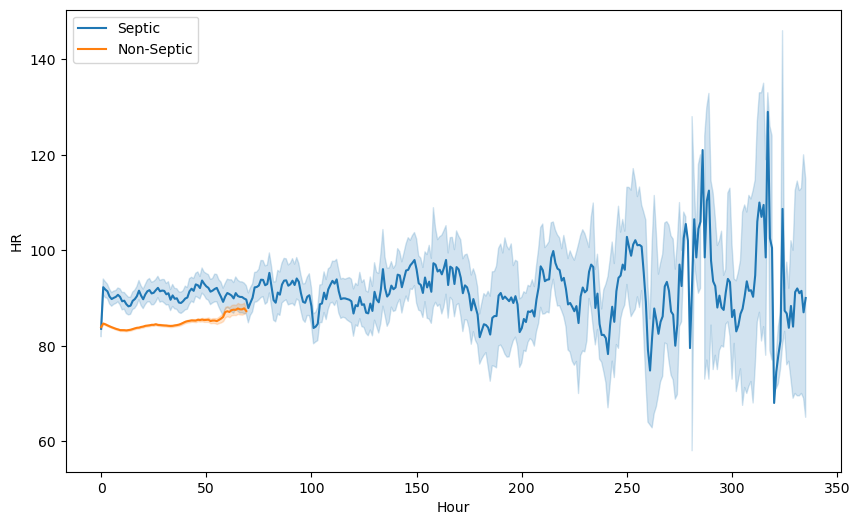

In [37]:
septic_patients = df[df['SepsisLabel'] == 1]
non_septic_patients = df[df['SepsisLabel'] == 0]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='HR', data=septic_patients, label='Septic')
sns.lineplot(x='Hour', y='HR', data=non_septic_patients, label='Non-Septic')
plt.legend()
plt.show()


In [38]:
label_columns = ['SepsisLabel','InfectionLabel', 'KidneyDysfunction', 'LiverDysfunction', 'CardioDysfunction', 'RespDysfunction']
for label in label_columns:
    print(f"{label}:")
    print(df[label].value_counts(normalize=True))


SepsisLabel:
SepsisLabel
0    0.982015
1    0.017985
Name: proportion, dtype: float64
InfectionLabel:
InfectionLabel
0    0.553013
1    0.446987
Name: proportion, dtype: float64
KidneyDysfunction:
KidneyDysfunction
False    0.689076
True     0.310924
Name: proportion, dtype: float64
LiverDysfunction:
LiverDysfunction
False    0.619631
True     0.380369
Name: proportion, dtype: float64
CardioDysfunction:
CardioDysfunction
False    0.949836
True     0.050164
Name: proportion, dtype: float64
RespDysfunction:
RespDysfunction
False    0.917398
True     0.082602
Name: proportion, dtype: float64


In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import joblib
import os
import pickle

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

def calculate_class_weights(y_train):
    """
    Calculate class weights for imbalanced datasets.
    """
    classes = np.unique(y_train)
    weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    return dict(zip(classes, weights))


def load_datasets(train_file, val_file, test_file):
    """
    Load preprocessed train, validation, and test datasets.
    """
    train = pd.read_csv(train_file)
    val = pd.read_csv(val_file)
    test = pd.read_csv(test_file)
    return train, val, test

def train_model(X_train, y_train, model_type='binary', class_weights=None):
    """
    Train a baseline model using Random Forest for binary or multiclass classification.
    """
    if model_type == 'binary':
        model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    elif model_type == 'multiclass':
        model = RandomForestClassifier(class_weight=class_weights, random_state=42)
    else:
        raise ValueError("Invalid model_type. Use 'binary' or 'multiclass'.")

    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X, y_true, model_type='binary'):
    """
    Evaluate the model on validation or test data.
    """
    y_pred = model.predict(X)
    if model_type == 'binary':
        y_prob = model.predict_proba(X)[:, 1]
        metrics = {
            "Accuracy": accuracy_score(y_true, y_pred),
            "F1-Score": f1_score(y_true, y_pred),
            "AUROC": roc_auc_score(y_true, y_prob)
        }
    elif model_type == 'multiclass':
        metrics = {
            "Accuracy": accuracy_score(y_true, y_pred),
            "F1-Score (weighted)": f1_score(y_true, y_pred, average='weighted'),
            "Classification Report": classification_report(y_true, y_pred)
        }
    return metrics, y_pred

def save_model(model, output_path):
    """
    Save the trained model to a file.
    """
    # Create the output directory if it doesn't exist
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    
    try:
        # Use pickle to save the model
        with open(output_path, 'wb') as f:
            pickle.dump(model, f)
        print(f"Model successfully saved to {output_path}")
    except Exception as e:
        print(f"Error saving model: {e}")

def main():
    # Configuration
    train_file = "../data/processed/train.csv"
    val_file = "../data/processed/val.csv"
    test_file = "../data/processed/test.csv"
    output_dir = "../models"

    
    # Load datasets
    train, val, test = load_datasets(train_file, val_file, test_file)
    train = train.dropna()
    val = val.dropna()
    test = test.dropna()
    print(train.columns)
    # Extract features and labels
    feature_cols = [col for col in train.columns if col not in ['InfectionLabel', 'OrganDysfunctionLabel', 'SepsisLabel']]
    X_train, y_train_infection, y_train_organ, y_train_sepsis = train[feature_cols], train['InfectionLabel'], train['OrganDysfunctionLabel'], train['SepsisLabel']
    X_val, y_val_infection, y_val_organ, y_val_sepsis = val[feature_cols], val['InfectionLabel'], val['OrganDysfunctionLabel'], val['SepsisLabel']
    X_test, y_test_infection, y_test_organ, y_test_sepsis = test[feature_cols], test['InfectionLabel'], test['OrganDysfunctionLabel'], test['SepsisLabel']

    # Example for InfectionLabel
    infection_class_weights = calculate_class_weights(y_train_infection)
    print("InfectionLabel Class Weights:", infection_class_weights)
    
    # Example for OrganDysfunctionLabel
    organ_class_weights = calculate_class_weights(y_train_organ)
    print("OrganDysfunctionLabel Class Weights:", organ_class_weights)

    # Disjoint feature sets for Infection and Organ Dysfunction Models
    infection_features = ['WBC', 'Glucose', 'Temp', 'HR', 'Resp']
    organ_features = ['Creatinine', 'Bilirubin_total', 'BUN', 'FiO2', 'SBP', 'MAP']


    # Train models
    print("Training Infection Model...")
    infection_model = train_model(X_train[infection_features], y_train_infection, model_type='binary', class_weights=infection_class_weights)

    print("Training Organ Dysfunction Model...")
    organ_model = train_model(X_train[organ_features], y_train_organ, model_type='binary', class_weights=organ_class_weights)

    print("Training Sepsis Model...")
    sepsis_model = train_model(X_train[organ_features+infection_features], y_train_sepsis, model_type='binary', class_weights=organ_class_weights)

    # Evaluate models
    print("Evaluating Infection Model...")
    infection_metrics, y_pred = evaluate_model(infection_model, X_val[infection_features], y_val_infection, model_type='binary')
    print("Infection Model Metrics:", infection_metrics)

    print("Evaluating Organ Dysfunction Model...")
    organ_metrics, y_pred = evaluate_model(organ_model, X_val[organ_features], y_val_organ, model_type='binary')
    print("Organ Dysfunction Model Metrics:", organ_metrics)

    print("Evaluating Sepsis Dysfunction Model...")
    sepsis_metrics, y_pred = evaluate_model(sepsis_model, X_val[organ_features+infection_features], y_val_sepsis, model_type='binary')
    print("Sepsis Dysfunction Model Metrics:", organ_metrics)

    # Combine predictions for Sepsis
    print("Predicting Sepsis Probability...")
    infection_prob = infection_model.predict_proba(X_val[infection_features])[:, 1]
    organ_prob = organ_model.predict_proba(X_val[organ_features]).max(axis=1)
    sepsis_prob = infection_prob * organ_prob

    # Evaluate Sepsis prediction
    sepsis_label = (sepsis_prob > 0.5).astype(int)
    print("Sepsis AUROC:", roc_auc_score(y_val_sepsis, sepsis_prob))

    # Save models
    save_model(infection_model, f"{output_dir}/infection_model.pkl")
    save_model(organ_model, f"{output_dir}/organ_model.pkl")
    save_model(sepsis_model, f"{output_dir}/sepsis_model.pkl")
    np.save(f"{output_dir}/sepsis_prob.npy", sepsis_prob)

    print("All models and outputs saved.")


if __name__ == "__main__":
    main()


Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'InfectionLabel',
       'KidneyDysfunction', 'LiverDysfunction', 'CardioDysfunction',
       'RespDysfunction', 'OrganDysfunctionLabel'],
      dtype='object')
InfectionLabel Class Weights: {0: 0.9428740690589031, 1: 1.0644945537932353}
OrganDysfunctionLabel Class Weights: {0: 1.1419951344850208, 1: 0.8894110509116843}
Training Infection Model...
Training Organ Dysfunction Model...
Training Sepsis Model...
Evaluating Infection Model...
Infection Model Metrics: {'Accuracy': 0.9222924446997989, 'F1-Score': 0.911606121670932

In [14]:
# Load datasets
train_file = "../data/processed/train.csv"
val_file = "../data/processed/val.csv"
test_file = "../data/processed/test.csv"
output_dir = "../models"


train, val, test = load_datasets(train_file, val_file, test_file)
train = train.dropna()
val = val.dropna()
test = test.dropna()
# Extract features and labels
feature_cols = [col for col in train.columns if col not in ['InfectionLabel', 'OrganDysfunctionLabel', 'SepsisLabel']]
X_train, y_train_infection, y_train_organ, y_train_sepsis = train[feature_cols], train['InfectionLabel'], train['OrganDysfunctionLabel'], train['SepsisLabel']
X_val, y_val_infection, y_val_organ, y_val_sepsis = val[feature_cols], val['InfectionLabel'], val['OrganDysfunctionLabel'], val['SepsisLabel']
X_test, y_test_infection, y_test_organ, y_test_sepsis = test[feature_cols], test['InfectionLabel'], test['OrganDysfunctionLabel'], test['SepsisLabel']


print("Correlation of features with InfectionLabel:")
print(X_train.corrwith(y_train_infection))

print("Correlation of features with OrganDysfunctionLabel:")
print(X_train.corrwith(y_train_organ))
print(X_train.iloc[:,8])

Correlation of features with InfectionLabel:
Hour                 0.006375
HR                   0.098716
O2Sat               -0.001491
Temp                 0.043323
SBP                 -0.022778
MAP                 -0.035188
DBP                 -0.032131
Resp                 0.037460
BaseExcess          -0.005123
HCO3                -0.050181
FiO2                 0.021201
pH                  -0.012656
PaCO2               -0.030670
SaO2                -0.017183
AST                  0.030196
BUN                  0.056359
Alkalinephos         0.032202
Calcium             -0.049611
Chloride             0.000313
Creatinine           0.018552
Bilirubin_direct     0.040610
Glucose              0.265443
Lactate              0.039057
Magnesium            0.016498
Phosphate            0.004977
Potassium            0.077018
Bilirubin_total      0.016489
TroponinI            0.046282
Hct                 -0.018991
Hgb                 -0.004690
PTT                 -0.002973
WBC                  0.46

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

class MultiTaskModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(MultiTaskModel, self).__init__()
        # Shared layers
        self.shared_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        # Task-specific layers
        self.infection_head = nn.Linear(hidden_dim, 1)
        self.organ_dysfunction_head = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        shared_output = self.shared_layer(x)
        infection_output = torch.sigmoid(self.infection_head(shared_output))
        organ_dysfunction_output = torch.sigmoid(self.organ_dysfunction_head(shared_output))
        return infection_output, organ_dysfunction_output


def train_multitask_model(model, optimizer, criterion, dataloader, device):
    model.train()
    total_loss = 0
    for batch in dataloader:
        x, y_infection, y_organ = batch
        x, y_infection, y_organ = x.to(device), y_infection.to(device), y_organ.to(device)
        optimizer.zero_grad()
        infection_output, organ_output = model(x)
        # Calculate losses
        infection_loss = criterion(infection_output.squeeze(), y_infection.float())
        organ_loss = criterion(organ_output.squeeze(), y_organ.float())

        # Combine losses (weighted sum)
        loss = 0.5 * infection_loss + 0.5 * organ_loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(dataloader)


def evaluate_multitask_model(model, dataloader, device):
    model.eval()
    all_infection_preds, all_organ_preds = [], []
    all_infection_labels, all_organ_labels = [], []
    with torch.no_grad():
        for batch in dataloader:
            x, y_infection, y_organ = batch
            x = x.to(device)
            infection_output, organ_output = model(x)
            infection_preds = infection_output.squeeze().cpu().numpy()
            organ_preds = organ_output.squeeze().cpu().numpy()

            all_infection_preds.extend(infection_preds)
            all_organ_preds.extend(organ_preds)
            all_infection_labels.extend(y_infection.numpy())
            all_organ_labels.extend(y_organ.numpy())

    # Metrics
    infection_metrics = {
        "Accuracy": accuracy_score(all_infection_labels, (np.array(all_infection_preds) > 0.5).astype(int)),
        "F1-Score": f1_score(all_infection_labels, (np.array(all_infection_preds) > 0.5).astype(int)),
        "AUROC": roc_auc_score(all_infection_labels, all_infection_preds)
    }

    organ_metrics = {
        "Accuracy": accuracy_score(all_organ_labels, (np.array(all_organ_preds) > 0.5).astype(int)),
        "F1-Score": f1_score(all_organ_labels, (np.array(all_organ_preds) > 0.5).astype(int)),
        "AUROC": roc_auc_score(all_organ_labels, all_organ_preds)
    }

    return infection_metrics, organ_metrics


# Example usage
if __name__ == "__main__":
    # Example DataLoader
    from torch.utils.data import DataLoader, TensorDataset
    X_train = X_train.astype({col: 'int32' for col in ['KidneyDysfunction', 'LiverDysfunction', 'CardioDysfunction', 'RespDysfunction']})

    # Assuming `X_train`, `y_train_infection`, and `y_train_organ` are numpy arrays
    train_dataset = TensorDataset(
        torch.tensor(X_train.values, dtype=torch.float32),
        torch.tensor(y_train_infection.values, dtype=torch.float32),
        torch.tensor(y_train_organ.values, dtype=torch.float32)
    )
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

    # Model, optimizer, and loss function
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MultiTaskModel(input_dim=X_train.shape[1], hidden_dim=64).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss

    # Train and evaluate
    for epoch in range(10):
        train_loss = train_multitask_model(model, optimizer, criterion, train_loader, device)
        print(f"Epoch {epoch + 1}: Train Loss = {train_loss:.4f}")

    X_val = X_val.astype({col: 'int32' for col in ['KidneyDysfunction', 'LiverDysfunction', 'CardioDysfunction', 'RespDysfunction']})

    # Evaluate on validation set
    val_dataset = TensorDataset(
        torch.tensor(X_val.values, dtype=torch.float32),
        torch.tensor(y_val_infection.values, dtype=torch.float32),
        torch.tensor(y_val_organ.values, dtype=torch.float32)
    )
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    infection_metrics, organ_metrics = evaluate_multitask_model(model, val_loader, device)
    print("Infection Metrics:", infection_metrics)
    print("Organ Dysfunction Metrics:", organ_metrics)


Epoch 1: Train Loss = 0.5040
Epoch 2: Train Loss = 0.1826
Epoch 3: Train Loss = 0.1604
Epoch 4: Train Loss = 0.1678
Epoch 5: Train Loss = 0.1745
Epoch 6: Train Loss = 0.2193
Epoch 7: Train Loss = 0.2049
Epoch 8: Train Loss = 0.2142
Epoch 9: Train Loss = 0.2084
Epoch 10: Train Loss = 0.2060
Infection Metrics: {'Accuracy': 0.9796857033346109, 'F1-Score': 0.9772702905543047, 'AUROC': 0.9991714393298893}
Organ Dysfunction Metrics: {'Accuracy': 0.9997125335377539, 'F1-Score': 0.9997296079315007, 'AUROC': 0.999840564728388}


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

class MultiTaskModel(pl.LightningModule):
    def __init__(self, input_dim, hidden_dim, lr=0.001):
        super(MultiTaskModel, self).__init__()
        # Save hyperparameters
        self.save_hyperparameters()
        
        # Shared layers
        self.shared_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        # Task-specific layers
        self.infection_head = nn.Linear(hidden_dim, 1)
        self.organ_dysfunction_head = nn.Linear(hidden_dim, 1)
        # Loss function
        self.criterion = nn.BCELoss()

    def forward(self, x):
        shared_output = self.shared_layer(x)
        infection_output = torch.sigmoid(self.infection_head(shared_output))
        organ_dysfunction_output = torch.sigmoid(self.organ_dysfunction_head(shared_output))
        return infection_output, organ_dysfunction_output

    def training_step(self, batch, batch_idx):
        x, y_infection, y_organ = batch
        infection_output, organ_output = self(x)

        # Compute loss
        infection_loss = self.criterion(infection_output.squeeze(), y_infection.float())
        organ_loss = self.criterion(organ_output.squeeze(), y_organ.float())
        loss = 0.5 * infection_loss + 0.5 * organ_loss

        # Log loss
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y_infection, y_organ = batch
        infection_output, organ_output = self(x)

        # Compute loss
        infection_loss = self.criterion(infection_output.squeeze(), y_infection.float())
        organ_loss = self.criterion(organ_output.squeeze(), y_organ.float())
        loss = 0.5 * infection_loss + 0.5 * organ_loss

        # Log loss
        self.log('val_loss', loss, on_step=False, on_epoch=True, prog_bar=True)
        return {'val_loss': loss}

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.hparams.lr)


# Example usage
if __name__ == "__main__":
    # Prepare data
    train_dataset = TensorDataset(
        torch.tensor(X_train.values, dtype=torch.float32),
        torch.tensor(y_train_infection.values, dtype=torch.float32),
        torch.tensor(y_train_organ.values, dtype=torch.float32)
    )
    
    val_dataset = TensorDataset(
        torch.tensor(X_val.values, dtype=torch.float32),
        torch.tensor(y_val_infection.values, dtype=torch.float32),
        torch.tensor(y_val_organ.values, dtype=torch.float32)
    )
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    # Initialize model
    model = MultiTaskModel(input_dim=X_train.shape[1], hidden_dim=64, lr=0.001)

    # Logger
    logger = TensorBoardLogger("tb_logs", name="multi_task_model")

    # Trainer
    trainer = pl.Trainer(
        max_epochs=10,
        logger=logger,
        log_every_n_steps=5,
        accelerator="cpu",
        devices = 1
    )

    # Train
    trainer.fit(model, train_loader, val_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name                   | Type       | Params
------------------------------------------------------
0 | shared_layer           | Sequential | 2.9 K 
1 | infection_head         | Linear     | 65    
2 | organ_dysfunction_head | Linear     | 65    
3 | criterion              | BCELoss    | 0     
------------------------------------------------------
3.0 K     Trainable params
0         Non-trainable params
3.0 K     Total params
0.012     Total estimated model params size (MB)


Sanity Checking: |                                                         | 0/? [00:00<?, ?it/s]

Training: |                                                                | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

Validation: |                                                              | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.
